<a href="https://colab.research.google.com/github/lomovtsevp/ML_course_MIREA/blob/main/ML2/PR4/Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Архитектура кодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          50,240
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------

Архитектура декодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 784]          50,960
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.19
Estimated Total Size (MB):

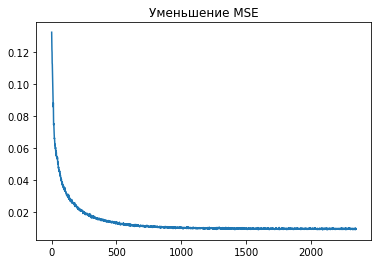

Проецирование скрытого пространства на плоскость..


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Готово!


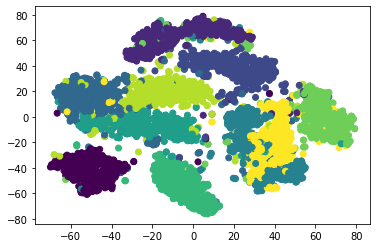

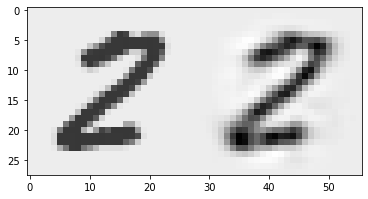

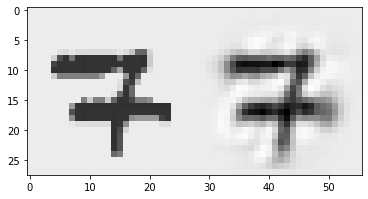

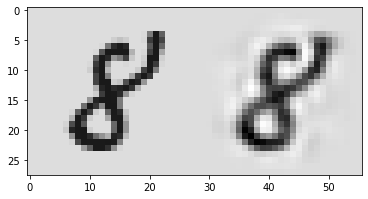

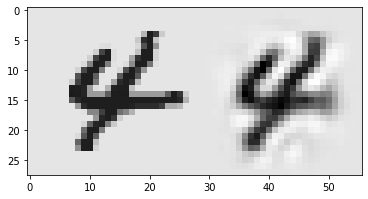

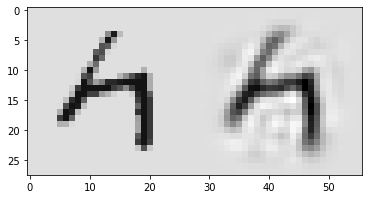

Расчет анимации..
Готово!


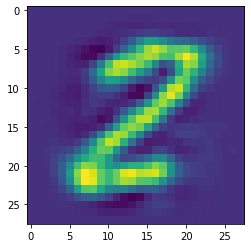

Обучение классификатора..
Эпоха 1 / 10. Потери на последнем пакете: 1.520645022392273
Эпоха 2 / 10. Потери на последнем пакете: 1.1653715372085571
Эпоха 3 / 10. Потери на последнем пакете: 0.9102955460548401
Эпоха 4 / 10. Потери на последнем пакете: 0.7390474677085876
Эпоха 5 / 10. Потери на последнем пакете: 0.6840474605560303
Эпоха 6 / 10. Потери на последнем пакете: 0.5679945349693298
Эпоха 7 / 10. Потери на последнем пакете: 0.6468622088432312
Эпоха 8 / 10. Потери на последнем пакете: 0.3937719166278839
Эпоха 9 / 10. Потери на последнем пакете: 0.478691965341568
Эпоха 10 / 10. Потери на последнем пакете: 0.4445957839488983
Готово!
Обучение классификатора..
Эпоха 1 / 10. Потери на последнем пакете: 2.122901678085327
Эпоха 2 / 10. Потери на последнем пакете: 1.894170880317688
Эпоха 3 / 10. Потери на последнем пакете: 1.7572036981582642
Эпоха 4 / 10. Потери на последнем пакете: 1.6487027406692505
Эпоха 5 / 10. Потери на последнем пакете: 1.4238362312316895
Эпоха 6 / 10. Потери на посл

In [29]:
import torch
import torch.nn as nn

import torch.optim as optim

from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

from itertools import chain
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score


# В этой части лабораторной работы вам предстоит реализовать и обучить автокодировочную сеть на наборе данных MNIST.
# Сценарий выполнения кода:
# 1. Обучение автокодировщика.
# 2. Отображение проекции скрытого пространства на плоскость для визуальной оценки распределения данных в скрытом пространстве.
# 3. Интерполяция между несколькими точками в скрытом пространстве, декодирование промежуточных точек в исходное пространство
# и анимация результата.
# 4. Обучение простого классификатора на исходных данных (изображениях цифр) и на векторах в скрытом пространстве.
# 5. Проверка полученных классификаторов на тестовых данных.

class Encoder(nn.Module):
    # Класс кодивщика, необходимо реализовать.

    def __init__(self, inputs, latent_size):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.encoder = nn.Linear(inputs, latent_size)
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
      x = x.view(x.size(0), -1)
        # ============
      return self.encoder(x)


class Decoder(nn.Module):
    # Класс декодировщика, необходимо реализовать.

    def __init__(self, latent_size, outputs):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Linear(latent_size, outputs)
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ

        # ============
        return self.decoder(x)


class SimpleClassifier(nn.Module):
    # Класс простого классификатора.

    def __init__(self, inputs, outputs):
        super().__init__()
        self.fc = nn.Linear(inputs, outputs)

        self._inputs = inputs

    def forward(self, x):
        x = x.reshape(-1, self._inputs)
        x = self.fc(x)
        return x


class LatentSpaceDataset(Dataset):
    # Класс для преобразования изображений в вектора скрытого пространства.

    def __init__(self, orig_space_data_loader, encoder):
        super().__init__()
        self._data = list()
        for batch, target in orig_space_data_loader:
            latent_space_imgs = encoder(batch).detach()
            self._data.extend(zip(latent_space_imgs, target))

    def __len__(self):
        return len(self._data)

    def __getitem__(self, i):
        return self._data[i]


def train_ae(data_loader, encoder, decoder, epochs, lr):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения и скорость обучения.

    encoder.train()
    decoder.train()


    print('Обучение автокодировщика..')

    loss_func = nn.MSELoss() # функция потерь, нужно выбрать.
    optimizer = torch.optim.Adam(chain(encoder.parameters(), decoder.parameters()))  # оптимизатор, нужно выбрать.
    loss_history = list()
    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            loss = loss_func(decoder(encoder(batch)), batch)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    print('Готово!')

    encoder.eval()
    decoder.eval()

    plt.title('Уменьшение MSE')
    plt.plot(loss_history)
    plt.show()


def train_classifier(data_loader, model, epochs, lr):
    # Функция для обучения классификатора.

    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    print('Обучение классификатора..')
    for epoch in range(epochs):
        for i, (batch, target) in enumerate(data_loader):
            optimizer.zero_grad()
            loss = loss_func(model(batch), target)
            loss.backward()
            optimizer.step()
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')
    print('Готово!')
    model.eval()


def test_classifier(data_loader, classifier):
    # Функция для тестирования классификатора.

    batch, target = next(iter(data_loader))
    print(accuracy_score(torch.argmax(classifier(batch), dim=1).detach().numpy(), target))


def lerp(v1, v2, t):
    # Функция для линейной интерполяции между двумя векторами.
    return v1 * (1 - t) + v2 * t


def get_frame(i, data):
    # Функция для анимации
    i = min(i, len(data) - 1)
    ax.clear()
    ax.imshow(data[i])


LATENT_SIZE = 64  # размерность скрытого пространства, можно варьировать.

BATCH_SIZE = 256
EPOCHS = 10
LEARNING_RATE = 1e-4

ANIMATION_IMAGES = 5
ANIMATION_N_FRAMES = (ANIMATION_IMAGES - 1) * 20
ANIMATION_INTERVAL = 50

encoder = Encoder(28 * 28, LATENT_SIZE)
decoder = Decoder(LATENT_SIZE,  28 * 28)

print('Архитектура кодировщика: ')
summary(encoder, [[28 * 28]])
print()
print('Архитектура декодировщика: ')
summary(decoder, [[LATENT_SIZE]])

train_data = MNIST('data', train=True, download=True, transform=ToTensor())
test_data = MNIST('data', train=False, download=True, transform=ToTensor())
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

train_ae(train_data_loader, encoder, decoder, EPOCHS, LEARNING_RATE)

test_imgs = list()
for batch, target in train_data_loader:
    test_imgs.extend(zip(batch, target))
    if len(test_imgs) > 5000:
        break
imgs_list, targets = zip(*test_imgs)
imgs = torch.stack(imgs_list)

print('Проецирование скрытого пространства на плоскость..')
tsne = TSNE()
latent_imgs_emb = [encoder(img.unsqueeze(0))[0].detach().numpy() for img in imgs]
latent_imgs_emb = tsne.fit_transform(np.array(latent_imgs_emb))
x, y = zip(*latent_imgs_emb)
plt.scatter(x, y, c=targets)
print('Готово!')
plt.show()

latent_imgs = encoder(imgs)
restored_imgs = decoder(latent_imgs)

restored_imgs = restored_imgs.reshape(-1, 1, 28, 28)

for i in range(5):
    orig_restored = torch.hstack((imgs[i][0], restored_imgs[i][0].detach()))
    plt.imshow(orig_restored.numpy(), cmap='Greys')
    plt.show()

print('Расчет анимации..')
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
animation_data = list()
for i in range(4 * 20):
    frames_per_conn = ANIMATION_N_FRAMES // (ANIMATION_IMAGES - 1)
    vec_index = i // frames_per_conn
    t = i % frames_per_conn / frames_per_conn
    interp_vec = lerp(latent_imgs[vec_index], latent_imgs[vec_index + 1], t)
    restored_img = decoder(interp_vec)
    restored_img = restored_img.reshape(-1, 1, 28, 28)
    animation_data.append(restored_img[0][0].detach().numpy())
print('Готово!')

animation = FuncAnimation(figure, get_frame, frames=ANIMATION_N_FRAMES, interval=ANIMATION_INTERVAL, fargs=(animation_data,))
plt.show()

x_classifier = SimpleClassifier(28 * 28, 10)
train_classifier(train_data_loader, x_classifier, epochs=10, lr=1e-4)

latent_space_train_data_loader = DataLoader(LatentSpaceDataset(train_data_loader, encoder), batch_size=BATCH_SIZE, shuffle=True)

z_classifier = SimpleClassifier(LATENT_SIZE, 10)
train_classifier(latent_space_train_data_loader, z_classifier, epochs=10, lr=1e-4)

orig_test_data_loader = DataLoader(test_data, batch_size=1024, shuffle=True)
latent_test_data_loader = DataLoader(LatentSpaceDataset(orig_test_data_loader, encoder), batch_size=1024, shuffle=True)

test_classifier(orig_test_data_loader, x_classifier)
test_classifier(latent_test_data_loader, z_classifier)

Архитектура кодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------

Архитектура декодировщика: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
--------------

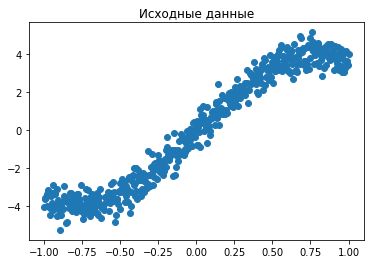

Эпоха 1 / 500. Потери на последнем пакете: 4.701892852783203
Эпоха 2 / 500. Потери на последнем пакете: 5.598791122436523
Эпоха 3 / 500. Потери на последнем пакете: 6.62022590637207
Эпоха 4 / 500. Потери на последнем пакете: 6.60518217086792
Эпоха 5 / 500. Потери на последнем пакете: 5.831432342529297
Эпоха 6 / 500. Потери на последнем пакете: 7.37330436706543
Эпоха 7 / 500. Потери на последнем пакете: 6.112329483032227
Эпоха 8 / 500. Потери на последнем пакете: 6.506342887878418
Эпоха 9 / 500. Потери на последнем пакете: 6.106603622436523
Эпоха 10 / 500. Потери на последнем пакете: 6.280480861663818
Эпоха 11 / 500. Потери на последнем пакете: 4.945473670959473
Эпоха 12 / 500. Потери на последнем пакете: 5.557772636413574
Эпоха 13 / 500. Потери на последнем пакете: 4.7706298828125
Эпоха 14 / 500. Потери на последнем пакете: 4.983104228973389
Эпоха 15 / 500. Потери на последнем пакете: 4.850939750671387
Эпоха 16 / 500. Потери на последнем пакете: 5.489606857299805
Эпоха 17 / 500. Потери

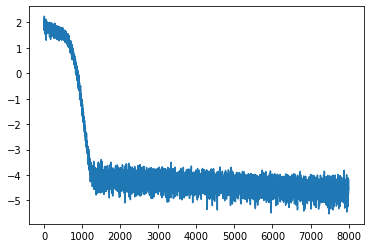

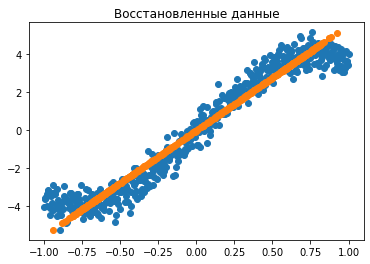

In [30]:
import torch
import torch.nn as nn

import torch.optim as optim
from itertools import chain

from torch.utils.data import DataLoader

from torchsummary import summary
from matplotlib import pyplot as plt


# В данной лабораторной работе вам предстоит реализовать и обучить автокодировочную нейронную сеть.
# В этой части в качесте данных для обучения представляются сгенерированные точки на плоскости.
# Цель в том, чтобы получить интуитивное понимание того, как автокодировщик параметризует многообразие,
# в окрестности которого располагаются точки в исходном признаковом пространстве.
# Для этого данные сначала проебразуются обученным кодировщиком, а затем докодируются обратно в исходное пространство.
# В итоге все точки лежат на параметризуемом многообразии (в данном случае, некоторой кривой на плоскости).

class Encoder(nn.Module):
    # Класс кодировщика, необходимо реализовать.

    def __init__(self, inputs, latent_size):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(inputs, latent_size))

        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        # ============
        return self.encoder(x)


class Decoder(nn.Module):
    # Класс декодировщика, необходимо реализовать.

    def __init__(self, latent_size, outputs):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Sequential(nn.Linear(latent_size, outputs))
        # ============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        
        # ============
        return self.decoder(x)


def train_ae(data_loader, encoder, decoder, epochs, lr):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения и скорость обучения.

    encoder.train()
    decoder.train()

    loss_history = list()

    loss_func = nn.MSELoss() # функция потерь, нужно выбрать.
    optimizer = torch.optim.Adam(chain(encoder.parameters(), decoder.parameters()))  # оптимизатор, нужно выбрать.

    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            # ВАШ КОД ЗДЕСЬ
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            loss = loss_func(decoder(encoder(batch)), batch)  # потери на пакете, нужно вычислить.
            loss.backward()
            optimizer.step()
            # ============
            loss_history.append(loss.log().item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    encoder.eval()
    decoder.eval()

    plt.plot(loss_history)
    plt.show()


# Создаем кодировщик и декодировщик
encoder = Encoder(2, 1)
decoder = Decoder(1, 2)

print('Архитектура кодировщика: ')
summary(encoder, [[2]])
print()
print('Архитектура декодировщика: ')
summary(decoder, [[1]])


# Генерируем данные
x = torch.linspace(-1, 1, steps=512)
y = 4 * torch.sin(2 * x) + torch.randn(512) / 2

plt.title('Исходные данные')
plt.scatter(x, y)
plt.show()

# Готовим обучающие данные
train_data = torch.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
train_data_loader = DataLoader(list(zip(train_data, [torch.tensor(0)] * train_data.shape[0])), batch_size=32, shuffle=True)

# Обучаем автокодировщик
train_ae(train_data_loader, encoder, decoder, 500, 5e-5)

# Прогоняем данные через автокодировщик
restored_data = decoder(encoder(train_data))

# Отображаем результат
plt.title('Восстановленные данные')
plt.scatter(x, y)
plt.scatter(*zip(*restored_data.detach().numpy()))
plt.show()

4.2 VAE WITH $μ$, $σ^2$
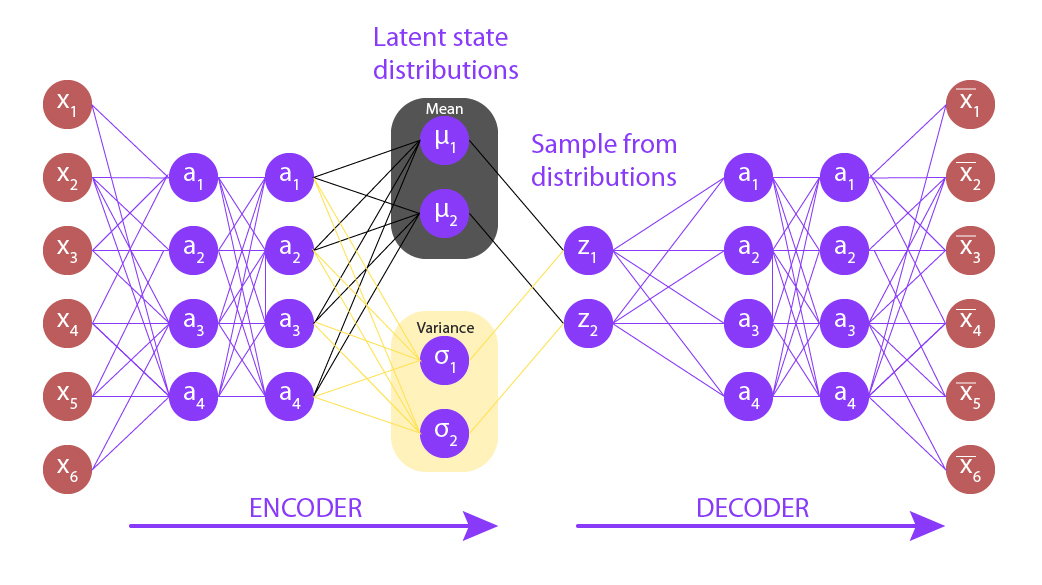

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          50,240
            Linear-2                   [-1, 32]           2,080
            Linear-3                   [-1, 32]           2,080
Total params: 54,400
Trainable params: 54,400
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.21
Estimated Total Size (MB): 0.21
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 784]          50,960
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backwa

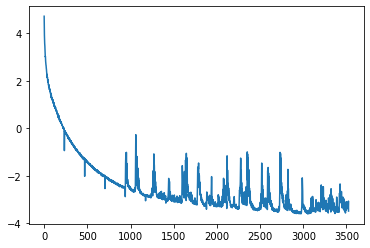

Проецирование скрытого пространства на плоскость..


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


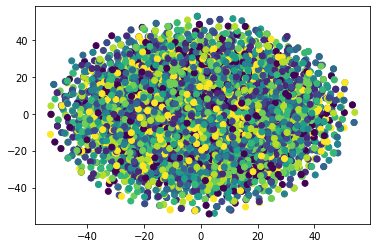

Готово!


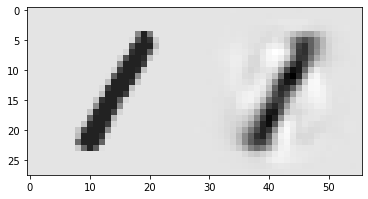

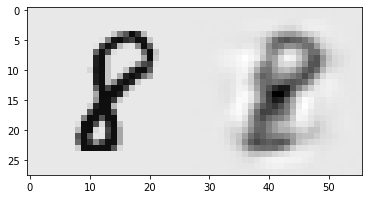

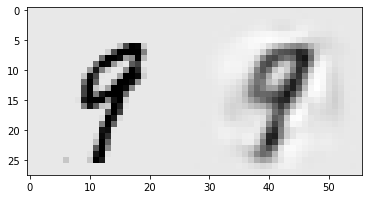

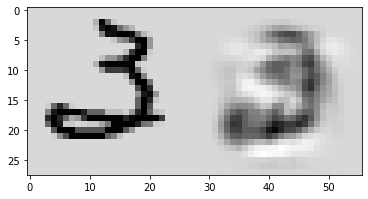

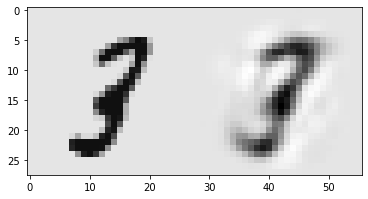

Рассчет анимации..
Готово!


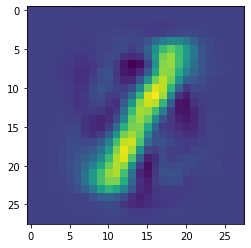

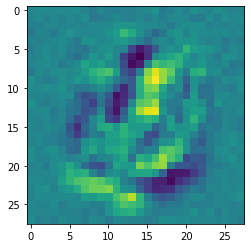

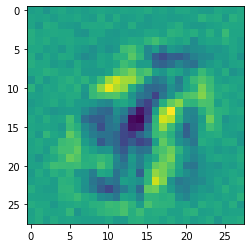

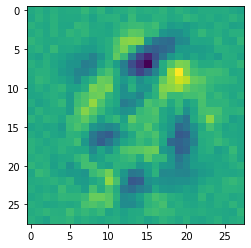

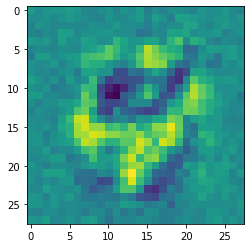

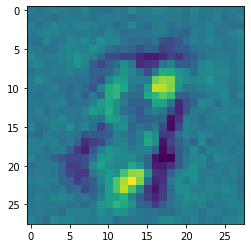

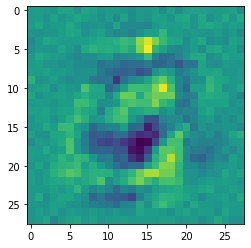

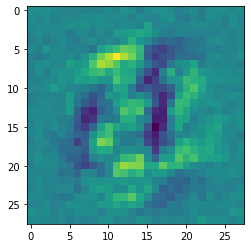

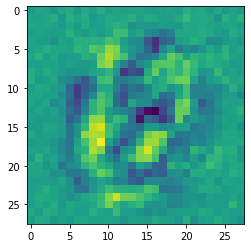

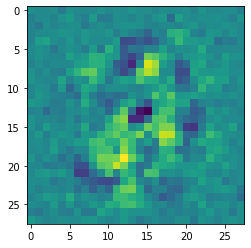

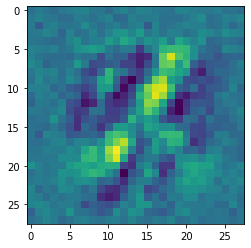

In [71]:
from torch.nn.modules.loss import KLDivLoss
import torch
import torch.nn as nn

import torch.optim as optim
from itertools import chain

from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from torchsummary import summary
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from sklearn.manifold import TSNE


# В этой части лабораторной работы вам предстоит спроектировать, реализовать и обучить вариационный автокодировщик для генерации рукописных цифр.
# Сценарий выполнения кода:
# 1. Обучение автокодировщика.
# 2. Отображение проекции скрытого пространства на плоскость для визуальной оценки распределения данных в скрытом пространстве.
# 3. Интерполяция между несколькими точками в скрытом пространстве, декодирование промежуточных точек в исходное пространство
# и анимация результата.
# 4. Генерация нескольких изображений цифр.
class Encoder(nn.Module):
    # Класс кодировщика, нужно реализовать.

    def __init__(self, latent_size):
        super().__init__()

        self.linear1 = torch.nn.Linear(784, latent_size)
        self._enc_mu = torch.nn.Linear(latent_size, 32)
        self._enc_log_sigma = torch.nn.Linear(latent_size, 32)


    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        mu =  self._enc_mu(x)
        log_var = self._enc_log_sigma(x)
        # ============
        return x, mu, log_var

    def sample_latent(self, x):
        # Метод для выборки z при помощи кодировщика.
        mu, log_var = self(x)[1], self(x)[2]
        return torch.randn_like(mu).to(device) * torch.exp(0.5 * log_var) + mu, mu, log_var


class Decoder(nn.Module):
    # Класс декодировщика, нужно реализовать.

    def __init__(self, latent_size):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.decoder = nn.Linear(latent_size, 784)

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ

        return self.decoder(x)


def train_ae(data_loader, encoder, decoder, epochs, lr, device):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения, скорость обучения и устройство,
    # на котором находится автокодировщик (cpu или cuda).

    print('Обучение автокодировщика..')

    encoder.train()
    decoder.train()
    recon_loss_func = nn.MSELoss()  # Функция потерь восстановления, нужно выбрать.

    kl_loss_func = nn.KLDivLoss(reduction='batchmean')  # Функция потерь похожести распределения на нормальное.
    optimizer = torch.optim.Adam(chain(encoder.parameters(), decoder.parameters()))  # Оптимизатор, нужно выбрать и настроить.
    loss_history = list()

    for epoch in range(epochs):
        for i, (batch, _) in enumerate(data_loader):
            # ВАШ КОД ЗДЕСЬ
            batch = batch.reshape(batch.shape[0], -1)
            optimizer.zero_grad()
            recon_loss = recon_loss_func(decoder(encoder(batch)[0]), batch)
            mu, log_var = encoder(batch)[1], encoder(batch)[2]
            KL = KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            loss = recon_loss + KL
            loss.backward()
            optimizer.step()
            # ============
            if i % 100 == 0:
                print('Потери восстановления:', recon_loss.item())
                print('Потери расхождения распределений:', KL.item())
            loss_history.append(loss.log().item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    encoder.eval()
    decoder.eval()

    print('Готово!')

    plt.plot(loss_history)
    plt.show()


def lerp(v1, v2, t):
    # Функция для линейной интерполяции между двумя векторами.
    return v1 * (1 - t) + v2 * t


def get_frame(i, data):
    # Функция для анимации
    i = min(i, len(data) - 1)
    ax.clear()
    ax.imshow(data[i])


LATENT_SIZE = 64  # размерность скрытого пространства, можно варьировать.

BATCH_SIZE = 256
EPOCHS = 15
LEARNING_RATE = 1e-4

ANIMATION_IMAGES = 5
ANIMATION_N_FRAMES = (ANIMATION_IMAGES - 1) * 20
ANIMATION_INTERVAL = 50

device = 'cuda' if torch.cuda.is_available() else 'cpu'

encoder = Encoder(LATENT_SIZE).to(device)
decoder = Decoder(LATENT_SIZE).to(device)

summary(encoder, [[1, 28, 28]])
summary(decoder, [[LATENT_SIZE]])

train_data = MNIST('data', train=True, download=True, transform=ToTensor())
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

train_ae(train_data_loader, encoder, decoder, EPOCHS, LEARNING_RATE, device)

test_imgs = list()
for batch, target in train_data_loader:
    test_imgs.extend(zip(batch, target))
    if len(test_imgs) > 5000:
        break
imgs_list, targets = zip(*test_imgs)
imgs = torch.stack(imgs_list).to(device)

print('Проецирование скрытого пространства на плоскость..')
tsne = TSNE()
latent_imgs_emb = [encoder.sample_latent(img.unsqueeze(0))[0].cpu().detach()[0].numpy() for img in imgs]
latent_imgs_emb = tsne.fit_transform(np.array(latent_imgs_emb))
x, y = zip(*latent_imgs_emb)
plt.scatter(x, y, c=targets)
plt.show()
print('Готово!')

latent_imgs = encoder(imgs)[0]
restored_imgs = decoder(latent_imgs)
restored_imgs = restored_imgs.reshape(-1, 1, 28, 28)


for i in range(5):
    orig_restored = torch.hstack((imgs[i][0], restored_imgs[i][0].detach()))
    plt.imshow(orig_restored.cpu().numpy(), cmap='Greys')
    plt.show()

print('Рассчет анимации..')
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
animation_data = list()
for i in range(4 * 20):
    frames_per_conn = ANIMATION_N_FRAMES // (ANIMATION_IMAGES - 1)
    vec_index = i // frames_per_conn
    t = i % frames_per_conn / frames_per_conn
    interp_vec = lerp(latent_imgs[vec_index], latent_imgs[vec_index + 1], t)
    restored_img = decoder(interp_vec.unsqueeze(0))
    restored_img = restored_img.reshape(-1, 1, 28, 28)
    animation_data.append(restored_img[0][0].detach().cpu().numpy())
print('Готово!')

animation = FuncAnimation(figure, get_frame, frames=ANIMATION_N_FRAMES, interval=ANIMATION_INTERVAL, fargs=(animation_data,))
plt.show()

for _ in range(10):
    gen_latent = torch.randn(1, LATENT_SIZE, device=device)
    gen_digit = decoder(gen_latent).cpu()
    plt.imshow(gen_digit.detach()[0].reshape(28, 28).numpy())
    plt.show()